In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data visulation
import glob # For including images
import cv2 # OpenCV 
import tensorflow as tf # Machine learning lib
from tensorflow import keras # Tensorflow high-level api
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("dataset\\fruits-360"))

# Any results you write to the current directory are saved as output.

['test', 'test-multiple_fruits', 'training']


In [17]:
# Import training dataset
training_fruit_img = []
training_label = []
for dir_path in glob.glob("dataset\\fruits-360\\training\\*"):
    img_label = dir_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64, 64))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        training_fruit_img.append(img)
        training_label.append(img_label)
training_fruit_img = np.array(training_fruit_img)
training_label = np.array(training_label)
len(np.unique(training_label))

90

In [18]:
training_label

array(['Apple Braeburn', 'Apple Braeburn', 'Apple Braeburn', ...,
       'Walnut', 'Walnut', 'Walnut'], dtype='<U19')

In [19]:
# Import test dataset
test_fruit_img = []
test_label = []
for dir_path in glob.glob("dataset\\fruits-360\\test\\*"):
    img_label = dir_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64, 64))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        test_fruit_img.append(img)
        test_label.append(img_label)
test_fruit_img = np.array(test_fruit_img)
test_label = np.array(test_label)
len(np.unique(test_label))

90

In [20]:
test_label

array(['Apple Braeburn', 'Apple Braeburn', 'Apple Braeburn', ...,
       'Walnut', 'Walnut', 'Walnut'], dtype='<U19')

In [21]:
# Import multiple-test dataset
test_fruits_img = []
tests_label = []
for img_path in glob.glob(os.path.join("dataset\\fruits-360\\test-multiple_fruits", "*.jpg")):
     img = cv2.imread(img_path)
     img = cv2.resize(img, (64, 64))
     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
     test_fruits_img.append(img)
     tests_label.append(img_label)
test_fruits_img = np.array(test_fruits_img)
tests_label = np.array(tests_label)
len(np.unique(tests_label))

1

In [22]:
label_to_id = {v : k for k, v in enumerate(np.unique(training_label))}
id_to_label = {v : k for k, v in label_to_id.items()}

In [23]:
training_label_id = np.array([label_to_id[i] for i in training_label])
test_label_id = np.array([label_to_id[i] for i in test_label])
test_label_id

array([ 0,  0,  0, ..., 89, 89, 89])

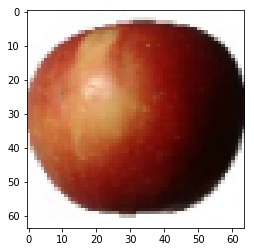

In [24]:
training_fruit_img, test_fruit_img = training_fruit_img / 255.0, test_fruit_img / 255.0 
plt.imshow(training_fruit_img[0])

In [27]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), input_shape = (64, 64, 3), padding = "same", activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(32, (3, 3), padding = "same", activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(32, (3, 3), padding = "same", activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3), padding = "same", activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation = "relu"))
model.add(keras.layers.Dense(90, activation = "softmax"))

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          18496     
__________

In [28]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = keras.optimizers.Adamax(), metrics = ['accuracy'])
tensorboard = keras.callbacks.TensorBoard(log_dir = "./Graph", histogram_freq = 0, write_graph = True, write_images = True)
model.fit(training_fruit_img, training_label_id, batch_size = 128, epochs = 10, callbacks = [tensorboard])

Epoch 1/10
46371/46371 [==============================] - 22s 469us/step - loss: 1.0628 - acc: 0.7340
Epoch 2/10
46371/46371 [==============================] - 21s 459us/step - loss: 0.0733 - acc: 0.9800
Epoch 3/10
46371/46371 [==============================] - 22s 464us/step - loss: 0.0254 - acc: 0.9934
Epoch 4/10
46371/46371 [==============================] - 21s 459us/step - loss: 0.0208 - acc: 0.9947
Epoch 5/10
46371/46371 [==============================] - 21s 462us/step - loss: 0.0036 - acc: 0.9992
Epoch 6/10
46371/46371 [==============================] - 21s 463us/step - loss: 0.0126 - acc: 0.9968
Epoch 7/10
46371/46371 [==============================] - 22s 464us/step - loss: 7.6851e-04 - acc: 0.9999
Epoch 8/10
46371/46371 [==============================] - 23s 507us/step - loss: 0.0021 - acc: 0.9995
Epoch 9/10
46371/46371 [==============================] - 22s 476us/step - loss: 0.0126 - acc: 0.9970
Epoch 10/10
46371/46371 [==============================] - 22s 476us/step - lo

In [29]:
loss, accuracy = model.evaluate(test_fruit_img, test_label_id)
print("\n\nLoss:", loss)
print("Accuracy:", accuracy)
model.save("model.h5")

15563/15563 [==============================] - 3s 191us/step


Loss: 0.06260873000404166
Accuracy: 0.9818158452740474


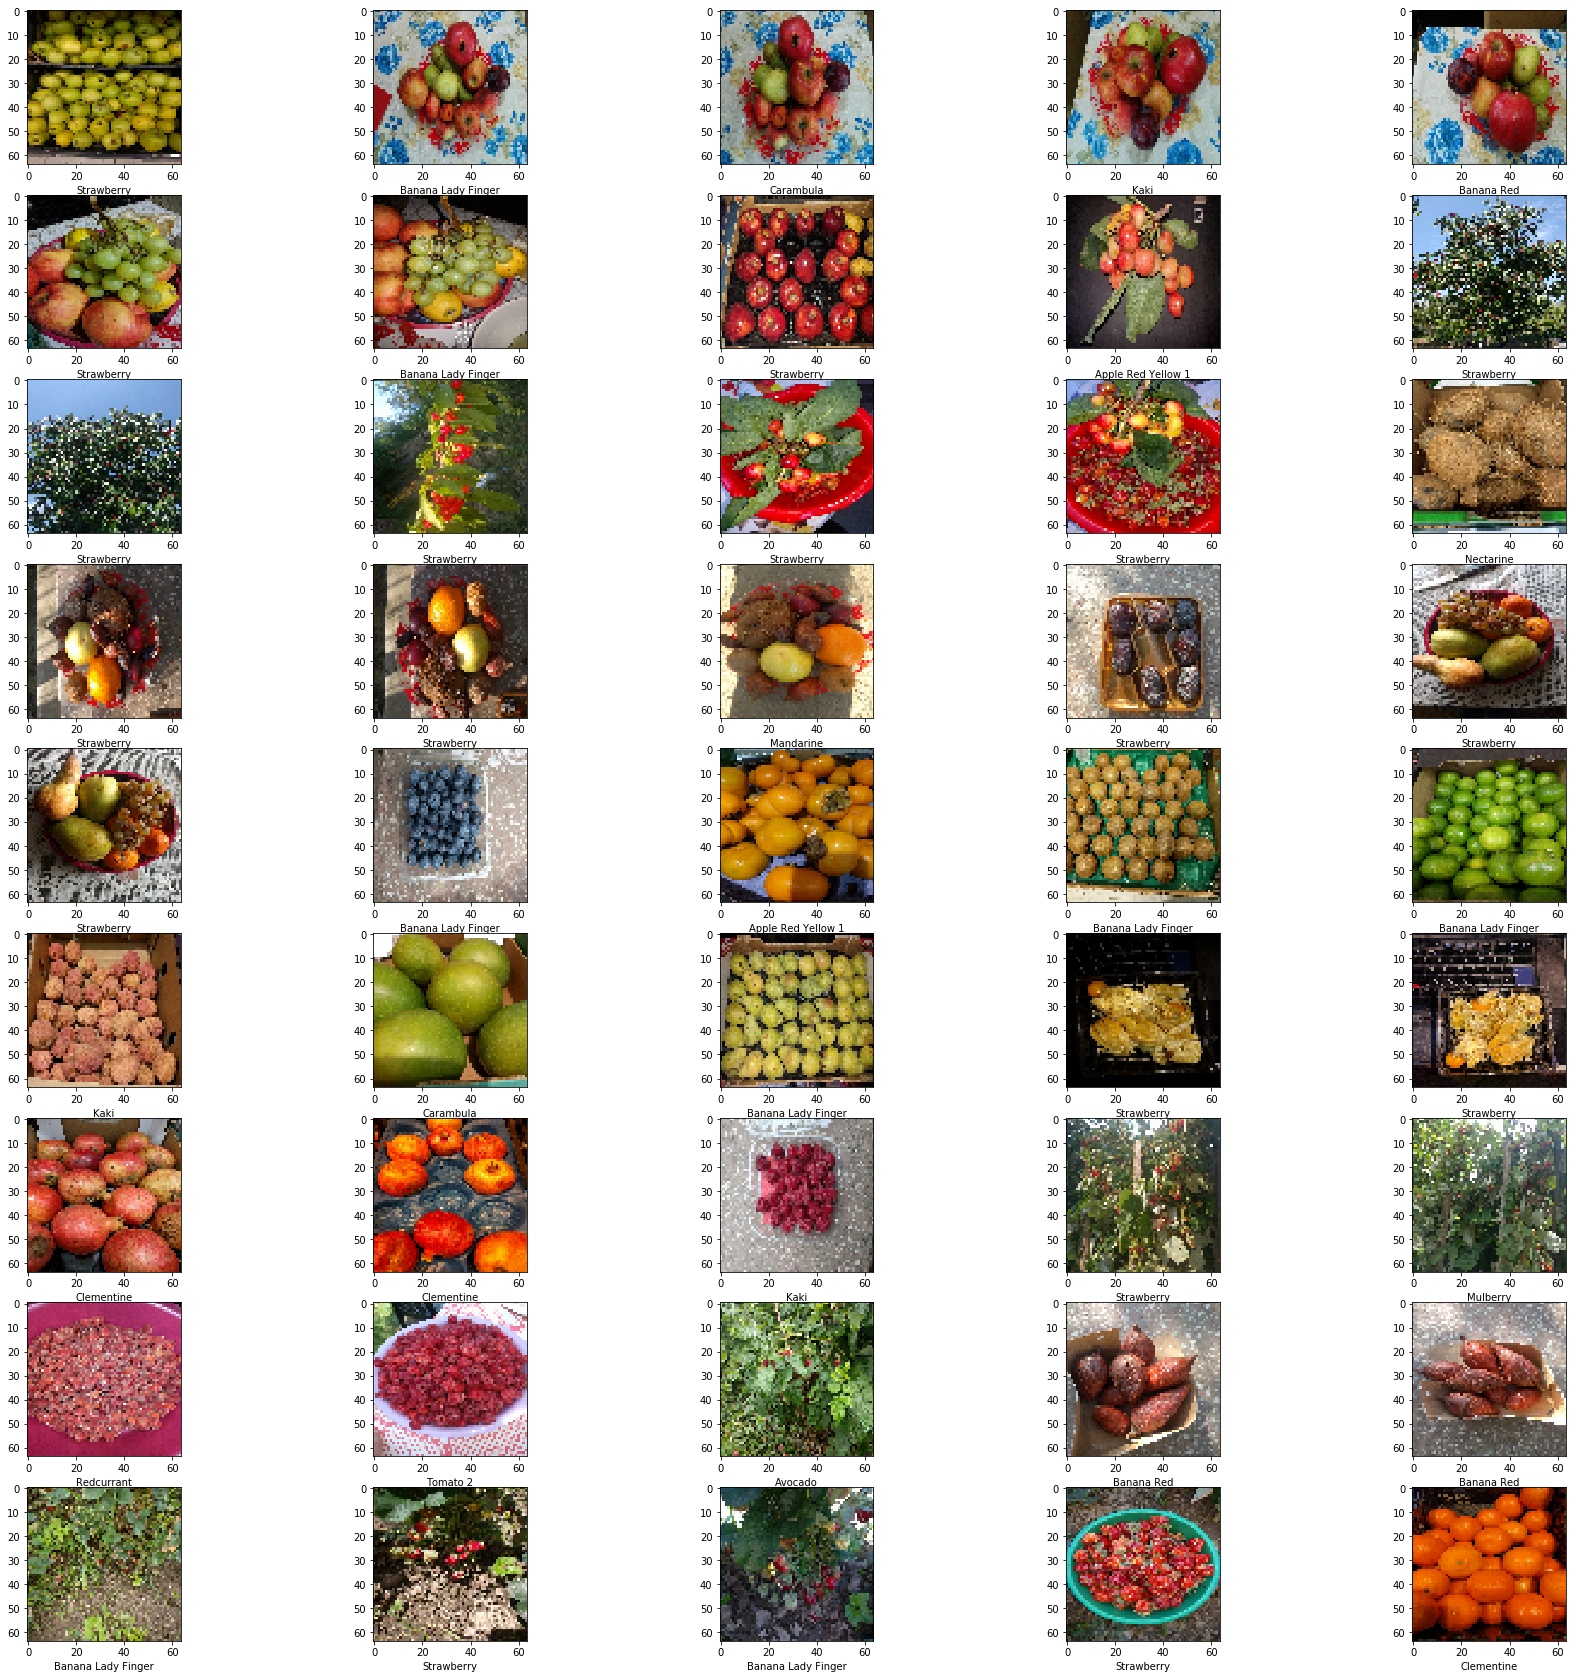

In [30]:
predictions = model.predict(test_fruits_img)
plt.figure(figsize = (30, 30))
for i in range(45):
    plt.subplot(9,5, i + 1)
    plt.xlabel("{}".format(id_to_label[np.argmax(predictions[i])]))
    plt.imshow(test_fruits_img[i])